In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DJS Compute/DE Task 1/breast_cancer_survival - breast_cancer_survival_.csv.csv")

In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
df.shape

(334, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [ ]:
df.describe()

,Age,Protein1,Protein2,Protein3,Protein4
count,334.000000,334.000000,334.000000,334.000000,334.000000
mean,58.886228,-0.029991,0.946896,-0.090204,0.009819
std,12.961212,0.563588,0.911637,0.585175,0.629055
min,29.000000,-2.340900,-0.978730,-1.627400,-2.025500
25%,49.000000,-0.358888,0.362173,-0.513748,-0.377090
50%,58.000000,0.006129,0.992805,-0.173180,0.041768
75%,68.000000,0.343598,1.627900,0.278353,0.425630
max,90.000000,1.593600,3.402200,2.193400,1.629900


# Handling missing and duplicated values

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Protein1,0
Protein2,0
Protein3,0
Protein4,0
Tumour_Stage,0
Histology,0
ER status,0
PR status,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
percentage_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'percentage_missing': percentage_missing})
missing_value_df.head(15)

,percentage_missing
Age,0.000000
Gender,0.000000
Protein1,0.000000
Protein2,0.000000
Protein3,0.000000
Protein4,0.000000
Tumour_Stage,0.000000
Histology,0.000000
ER status,0.000000
PR status,0.000000


In [ ]:
df.dropna(subset=['Date_of_Last_Visit','Patient_Status'], inplace = True)

In [ ]:
df.shape

(317, 15)

# Data Preprocessing

In [ ]:
df['Gender'].value_counts()

,count
Gender,
FEMALE,313
MALE,4


In [ ]:
df['Gender'] = df['Gender'].replace('MALE', 'FEMALE')

In [ ]:
df['Tumour_Stage'].value_counts()

,count
Tumour_Stage,
II,180
III,77
I,60


In [ ]:
df['Tumour_Stage'] = df['Tumour_Stage'].replace({'I': 1, 'II': 2, 'III': 3})

In [ ]:
df['ER status'].value_counts()

,count
ER status,
Positive,317


In [ ]:
df['PR status'].value_counts()

,count
PR status,
Positive,317


In [ ]:
df['HER2 status'].value_counts()

,count
HER2 status,
Negative,288
Positive,29


In [ ]:
df[['Day_of_Surgery', 'Month_of_Surgery', 'Year_of_Surgery']] = df['Date_of_Surgery'].str.split('-', expand=True)

In [ ]:
df[['Day_of_Last_Visit', 'Month_of_Last_Visit','Year_of_Last_Visit']] = df['Date_of_Last_Visit'].str.split('-', expand=True)

In [ ]:
df['Month_of_Surgery'].value_counts()

,count
Month_of_Surgery,
May,31
Nov,31
Mar,29
Oct,28
Apr,27
Jun,27
Sep,26
Jul,25
Dec,24


In [ ]:
Month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12
}

df['Month_of_Surgery'] = df['Month_of_Surgery'].map(Month_mapping)

In [ ]:
df['Month_of_Last_Visit'].value_counts()

,count
Month_of_Last_Visit,
Feb,44
Aug,32
Jan,32
Jun,29
Oct,28
Dec,25
Mar,25
May,21
Nov,21


In [ ]:
df['Month_of_Last_Visit'] = df['Month_of_Last_Visit'].map(Month_mapping)

In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,...,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,2,Infiltrating Ductal Carcinoma,Positive,Positive,...,Other,20-May-18,26-Aug-18,Alive,20,5,18,26,8,18
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,2,Infiltrating Ductal Carcinoma,Positive,Positive,...,Other,26-Apr-18,25-Jan-19,Dead,26,4,18,25,1,19
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,2,Infiltrating Ductal Carcinoma,Positive,Positive,...,Lumpectomy,24-Aug-18,08-Apr-20,Alive,24,8,18,08,4,20
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,1,Infiltrating Ductal Carcinoma,Positive,Positive,...,Other,16-Nov-18,28-Jul-20,Alive,16,11,18,28,7,20
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,2,Infiltrating Ductal Carcinoma,Positive,Positive,...,Lumpectomy,12-Dec-18,05-Jan-19,Alive,12,12,18,05,1,19


In [ ]:
df = df.drop(columns=['Date_of_Surgery'],axis=1)
df = df.drop(columns=['Date_of_Last_Visit'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 317 entries, 0 to 333
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  317 non-null    int64  
 1   Gender               317 non-null    object 
 2   Protein1             317 non-null    float64
 3   Protein2             317 non-null    float64
 4   Protein3             317 non-null    float64
 5   Protein4             317 non-null    float64
 6   Tumour_Stage         317 non-null    int64  
 7   Histology            317 non-null    object 
 8   ER status            317 non-null    object 
 9   PR status            317 non-null    object 
 10  HER2 status          317 non-null    object 
 11  Surgery_type         317 non-null    object 
 12  Patient_Status       317 non-null    object 
 13  Day_of_Surgery       317 non-null    object 
 14  Month_of_Surgery     317 non-null    int64  
 15  Year_of_Surgery      317 non-null    object 


In [ ]:
df['Day_of_Surgery'] = df['Day_of_Surgery'].astype(int)
df['Year_of_Surgery'] = df['Year_of_Surgery'].astype(int)
df['Day_of_Last_Visit'] = df['Day_of_Last_Visit'].astype(int)
df['Year_of_Last_Visit'] = df['Year_of_Last_Visit'].astype(int)

In [ ]:
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,20,5,18,26,8,18
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Dead,26,4,18,25,1,19
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,2,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,Alive,24,8,18,8,4,20
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,1,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,Alive,16,11,18,28,7,20
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,2,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,Alive,12,12,18,5,1,19


# Outlier Removal

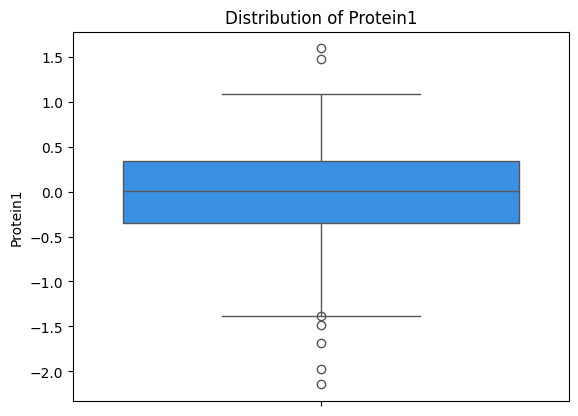

In [ ]:
sns.boxplot(data=df, y='Protein1', color='dodgerblue').set(title='Distribution of Protein1')
plt.show()

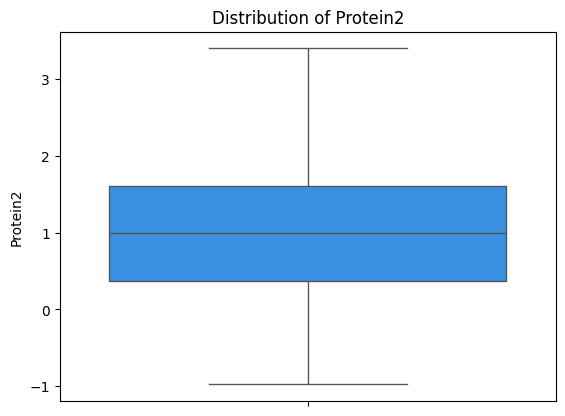

In [ ]:
sns.boxplot(data=df, y='Protein2', color='dodgerblue').set(title='Distribution of Protein2')
plt.show()

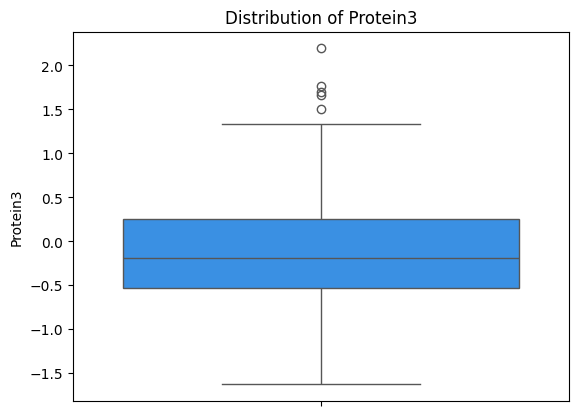

In [ ]:
sns.boxplot(data=df, y='Protein3', color='dodgerblue').set(title='Distribution of Protein3')
plt.show()

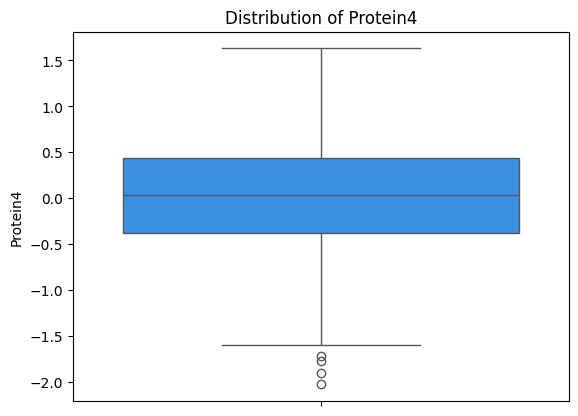

In [ ]:
sns.boxplot(data=df, y='Protein4', color='dodgerblue').set(title='Distribution of Protein4')
plt.show()

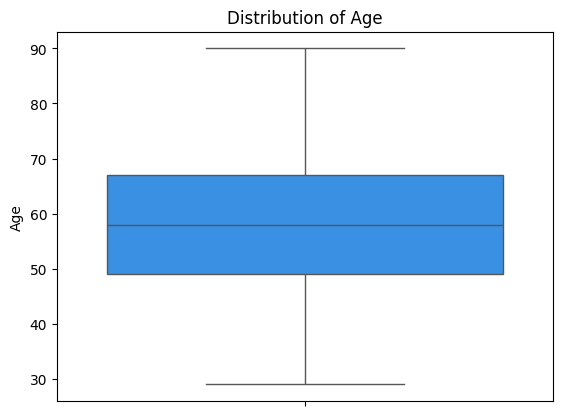

In [ ]:
sns.boxplot(data=df, y='Age', color='dodgerblue').set(title='Distribution of Age')
plt.show()

In [ ]:
def remove_outliers_iqr(df, columns):

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_to_check = ['Protein1', 'Protein3','Protein4']
df = remove_outliers_iqr(df, columns_to_check)

In [ ]:
df.shape

(299, 19)

# Visualizations

## Histogram

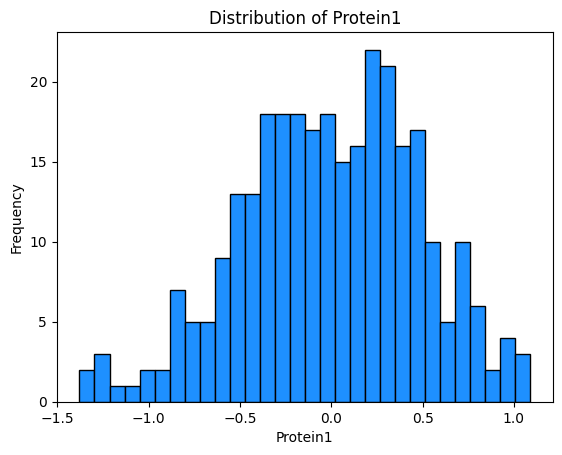

In [ ]:
plt.hist(df['Protein1'], bins=30, edgecolor='black', color='dodgerblue')
plt.title('Distribution of Protein1')
plt.xlabel('Protein1')
plt.ylabel('Frequency')
plt.show()

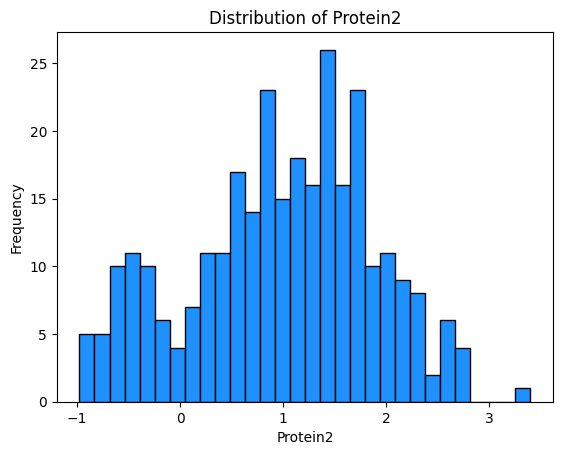

In [ ]:
plt.hist(df['Protein2'], bins=30, edgecolor='black', color='dodgerblue')
plt.title('Distribution of Protein2')
plt.xlabel('Protein2')
plt.ylabel('Frequency')
plt.show()

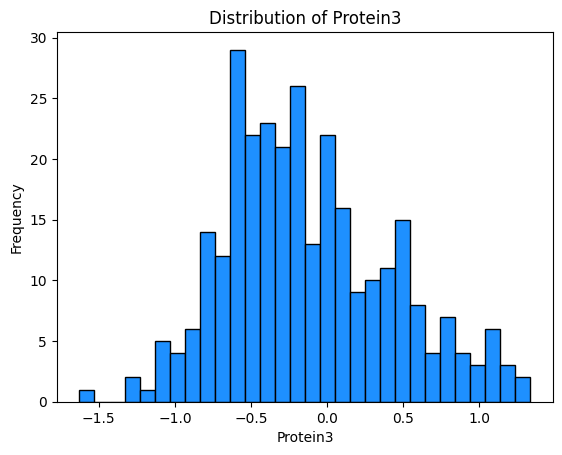

In [ ]:
plt.hist(df['Protein3'], bins=30, edgecolor='black', color='dodgerblue')
plt.title('Distribution of Protein3')
plt.xlabel('Protein3')
plt.ylabel('Frequency')
plt.show()

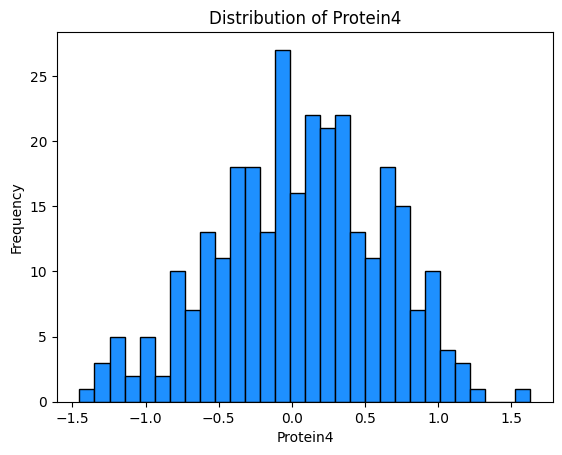

In [ ]:
plt.hist(df['Protein4'], bins=30, edgecolor='black', color='dodgerblue')
plt.title('Distribution of Protein4')
plt.xlabel('Protein4')
plt.ylabel('Frequency')
plt.show()

## Pie Chart

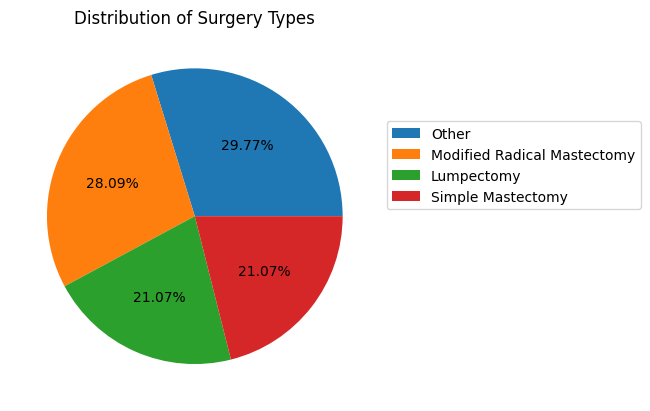

In [ ]:
surgery_counts = df['Surgery_type'].value_counts()

plt.pie(surgery_counts, autopct='%.2f%%')
plt.legend(labels=surgery_counts.index, loc='lower left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Surgery Types')
plt.show()

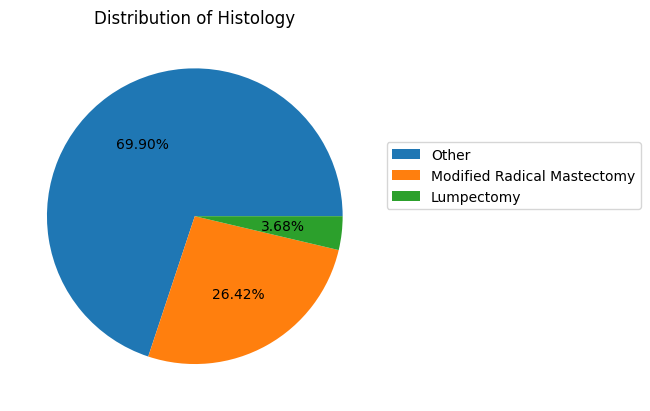

In [ ]:
histology_counts = df['Histology'].value_counts()

plt.pie(histology_counts, autopct='%.2f%%')
plt.legend(labels=surgery_counts.index, loc='lower left', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Histology')
plt.show()

## Countplot

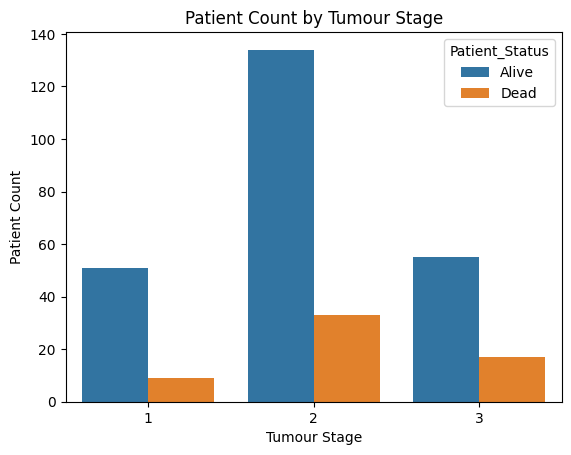

In [ ]:
sns.countplot(x='Tumour_Stage', hue='Patient_Status', data=df)
plt.title('Patient Count by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Patient Count')
plt.show()

## Violin Plot

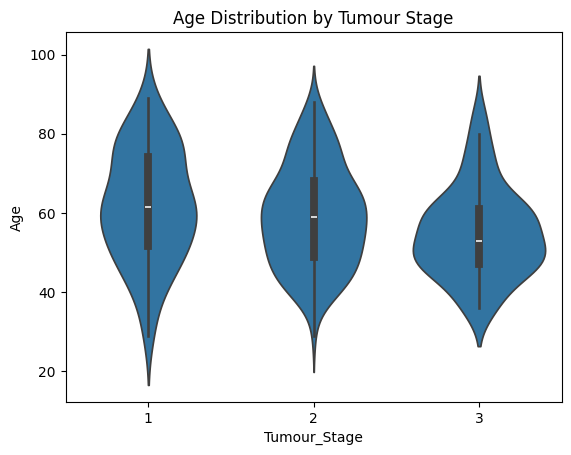

In [ ]:
sns.violinplot(x='Tumour_Stage', y='Age', data=df)
plt.title('Age Distribution by Tumour Stage')
plt.show()

## Pairplot

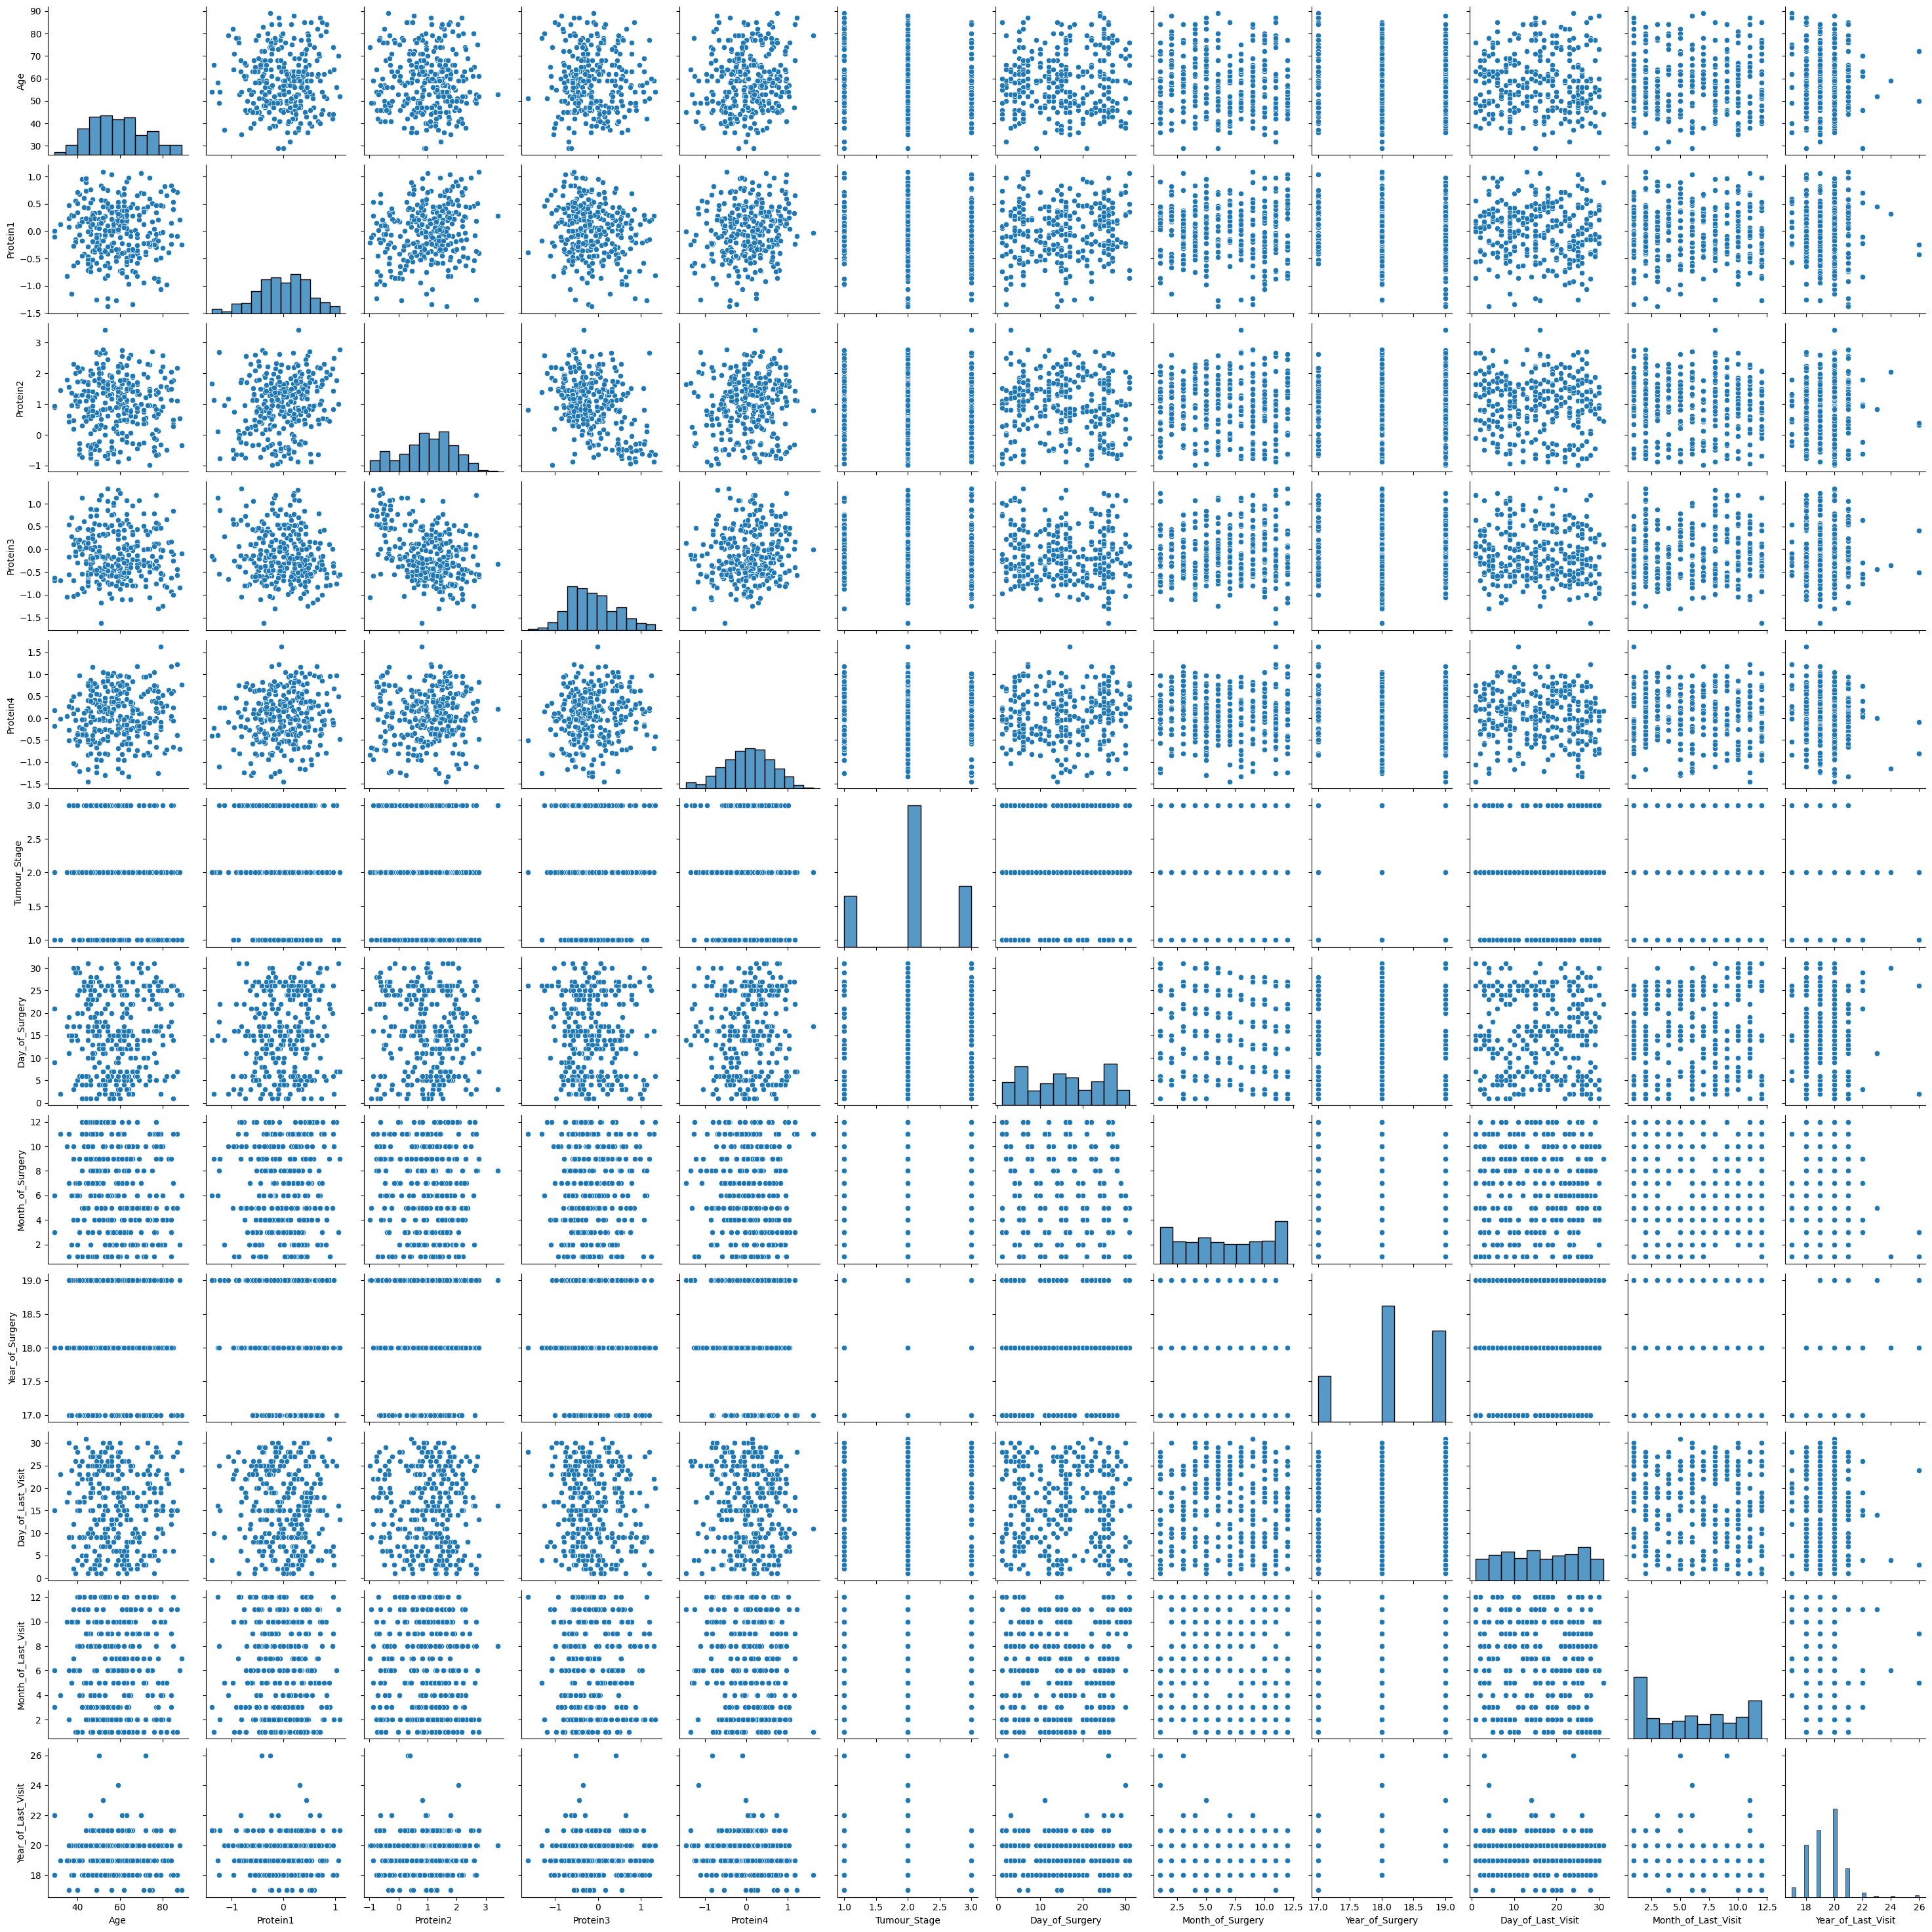

In [ ]:
sns.pairplot(df)
plt.show()

## Correlation Heatmap

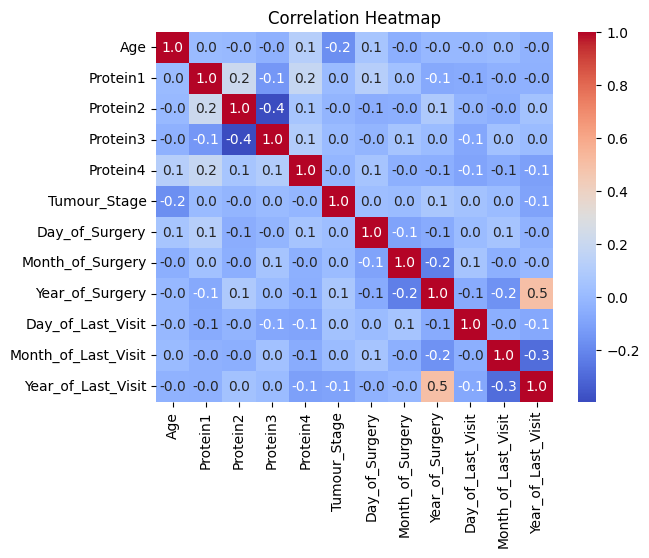

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

# Model Fitting

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 333
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  299 non-null    int64  
 1   Gender               299 non-null    object 
 2   Protein1             299 non-null    float64
 3   Protein2             299 non-null    float64
 4   Protein3             299 non-null    float64
 5   Protein4             299 non-null    float64
 6   Tumour_Stage         299 non-null    int64  
 7   Histology            299 non-null    object 
 8   ER status            299 non-null    object 
 9   PR status            299 non-null    object 
 10  HER2 status          299 non-null    object 
 11  Surgery_type         299 non-null    object 
 12  Patient_Status       299 non-null    object 
 13  Day_of_Surgery       299 non-null    int64  
 14  Month_of_Surgery     299 non-null    int64  
 15  Year_of_Surgery      299 non-null    int64  


In [ ]:
df['Gender'].value_counts()

,count
Gender,
FEMALE,299


In [ ]:
df['Histology'].value_counts()

,count
Histology,
Infiltrating Ductal Carcinoma,209
Infiltrating Lobular Carcinoma,79
Mucinous Carcinoma,11


In [ ]:
df['ER status'].value_counts()

,count
ER status,
Positive,299


In [ ]:
df['PR status'].value_counts()

,count
PR status,
Positive,299


In [ ]:
df['HER2 status'].value_counts()

,count
HER2 status,
Negative,271
Positive,28


In [ ]:
df['Surgery_type'].value_counts()

,count
Surgery_type,
Other,89
Modified Radical Mastectomy,84
Lumpectomy,63
Simple Mastectomy,63


In [ ]:
df['Patient_Status'].value_counts()

,count
Patient_Status,
Alive,240
Dead,59


In [ ]:
df_new = df.copy()

Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df_new.columns:
    if df_new[column].dtype == 'object':
        df_new[column] = le.fit_transform(df_new[column])

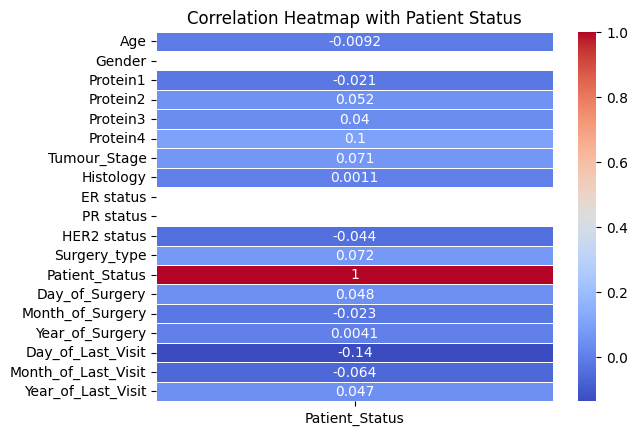

In [ ]:
correlation_matrix = df_new.corr()

patient_status_corr = correlation_matrix[['Patient_Status']]

sns.heatmap(patient_status_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Patient Status')
plt.show()

In [ ]:
df_new.drop(['Gender','ER status','PR status'], axis=1 , inplace=True)

In [ ]:
df_new.head(10)

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Day_of_Surgery,Month_of_Surgery,Year_of_Surgery,Day_of_Last_Visit,Month_of_Last_Visit,Year_of_Last_Visit
0,42,0.95256,2.15000,0.007972,-0.048340,2,0,0,2,0,20,5,18,26,8,18
1,54,0.00000,1.38020,-0.498030,-0.507320,2,0,0,2,1,26,4,18,25,1,19
2,63,-0.52303,1.76400,-0.370190,0.010815,2,0,0,0,0,24,8,18,8,4,20
3,78,-0.87618,0.12943,-0.370380,0.132190,1,0,0,2,0,16,11,18,28,7,20
4,42,0.22611,1.74910,-0.543970,-0.390210,2,0,1,0,0,12,12,18,5,1,19
5,80,0.46647,2.57970,-1.253700,0.151540,3,0,0,1,0,25,6,18,16,2,19
6,66,-0.72486,-0.28289,0.959430,0.350900,2,0,0,0,0,27,10,18,19,6,19
7,36,0.46931,1.55260,-0.165240,-0.275990,3,0,0,1,0,19,7,18,30,6,19
8,58,-1.26850,0.10613,1.135200,-0.394920,2,0,0,2,0,15,6,18,16,12,19
10,51,-0.38466,0.80609,-1.627400,-0.512910,2,0,1,1,0,26,11,18,28,12,19


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 333
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  299 non-null    int64  
 1   Protein1             299 non-null    float64
 2   Protein2             299 non-null    float64
 3   Protein3             299 non-null    float64
 4   Protein4             299 non-null    float64
 5   Tumour_Stage         299 non-null    int64  
 6   Histology            299 non-null    int64  
 7   HER2 status          299 non-null    int64  
 8   Surgery_type         299 non-null    int64  
 9   Patient_Status       299 non-null    int64  
 10  Day_of_Surgery       299 non-null    int64  
 11  Month_of_Surgery     299 non-null    int64  
 12  Year_of_Surgery      299 non-null    int64  
 13  Day_of_Last_Visit    299 non-null    int64  
 14  Month_of_Last_Visit  299 non-null    int64  
 15  Year_of_Last_Visit   299 non-null    int64  


## 1. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_new.drop('Patient_Status', axis=1)
y = df_new['Patient_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_1= RandomForestClassifier(random_state=42)
model_1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_1 = model_1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_1)
print('Accuracy:', accuracy*100)

Accuracy: 88.33333333333333


## 2. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(random_state=42)
model_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
y_pred_2 = model_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_2)
print('Accuracy:', accuracy*100)

Accuracy: 88.33333333333333
